In [464]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, array_to_latex
from math import pi
%matplotlib inline

In [465]:
q0 = QuantumRegister(1, name='q0')
q1 = QuantumRegister(1, name='q1')
q2 = QuantumRegister(1, name='q2')

crz = ClassicalRegister(1, name='crz')
crx = ClassicalRegister(1, name='crx')

circuit = QuantumCircuit(q0, q1, q2, crz, crx)

circuit.rx(pi/3, 2)
circuit.barrier()


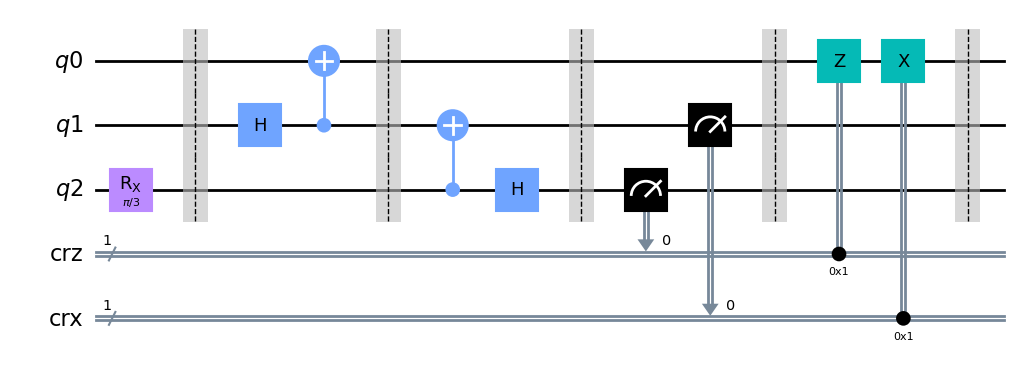

In [466]:
circuit.h(1)
circuit.cx(1,0)
circuit.barrier()

circuit.cx(2,1)
circuit.h(2)

circuit.barrier()

circuit.measure(q2, crz)
circuit.measure(q1, crx)

circuit.barrier()

circuit.z(0).c_if(crz, 1)
circuit.x(0).c_if(crx, 1)

circuit.barrier()
circuit.draw(output='mpl')

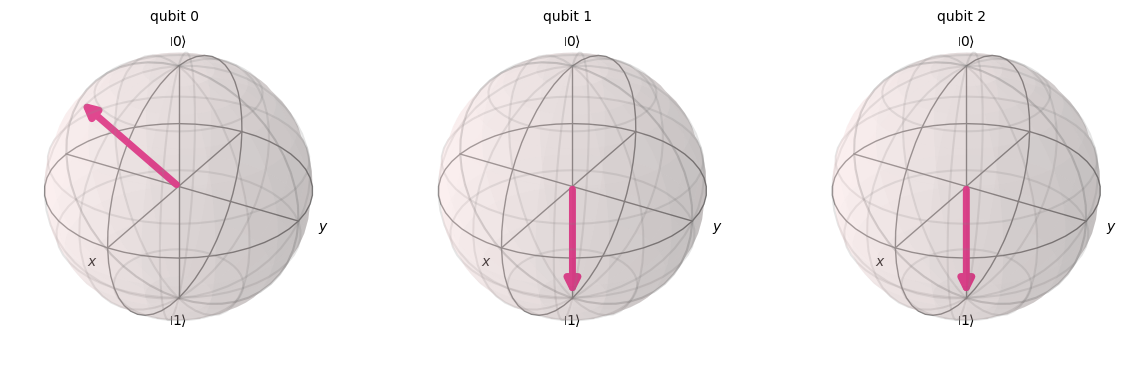

In [494]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend = simulator).result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)

In [484]:
#cr_result = ClassicalRegister(1, name='result')
#circuit.add_register(cr_result)
#circuit.measure(0, 2)
#circuit.draw(output='mpl')

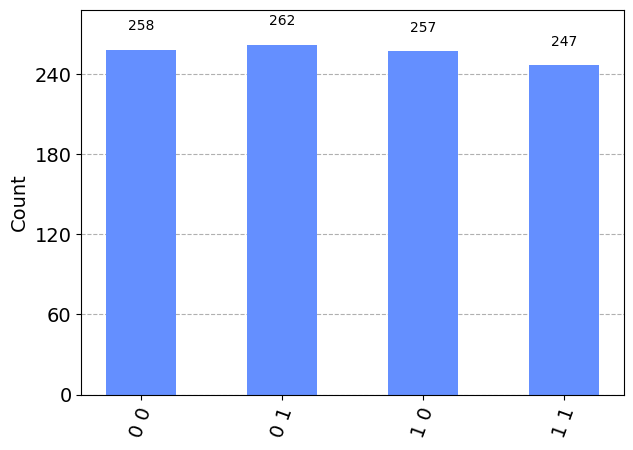

In [469]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator).result()
result_counts = result.get_counts()
plot_histogram(result_counts)

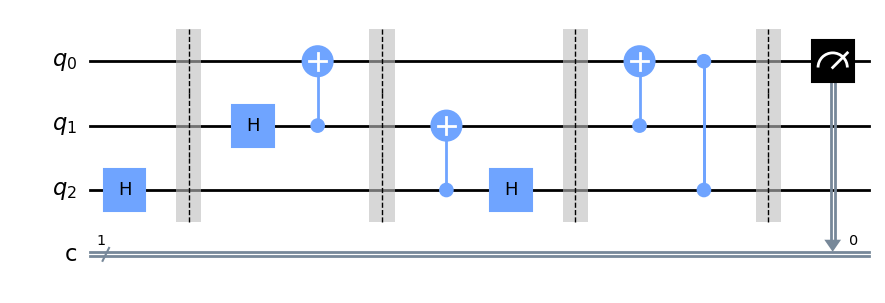

In [500]:
circuit_def = QuantumCircuit(3,1)

circuit_def.h(2)
circuit_def.barrier()

circuit_def.h(1)
circuit_def.cx(1,0)

circuit_def.barrier()

circuit_def.cx(2,1)
circuit_def.h(2)

circuit_def.barrier()

circuit_def.cx(1,0)
circuit_def.cz(0,2)

circuit_def.barrier()

circuit_def.measure(0,0)

circuit_def.draw(output='mpl')

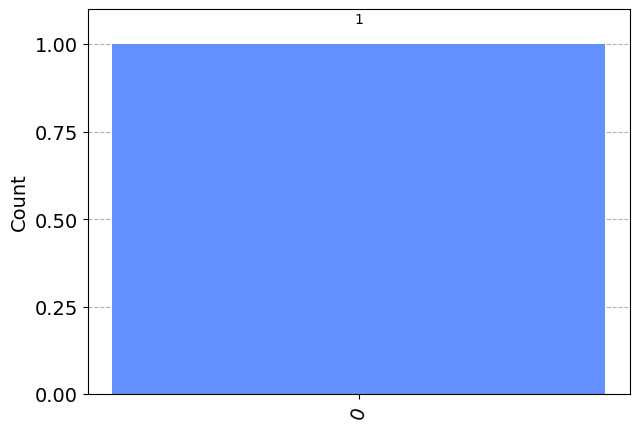

In [501]:
result = execute(circuit_def, backend = simulator).result()
result_counts = result.get_counts()
plot_histogram(result_counts)

In [502]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
IBMQ.save_account('13767493f51f2f1e4c1c1180f2e46d817de4c211825912944c9c683be72ae7ce58827366a0310b89634b68b010a40e58748623946b6c89e74ae7fdc33785612b')
provider = IBMQ.load_account()

configrc.store_credentials:WARNING:2023-08-05 15:39:32,080: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2023-08-05 15:39:33,151: Credentials are already in use. The existing account in the session will be replaced.


In [503]:
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit_def, backend= qcomp)
job_monitor(job)

Job Status: job has successfully run


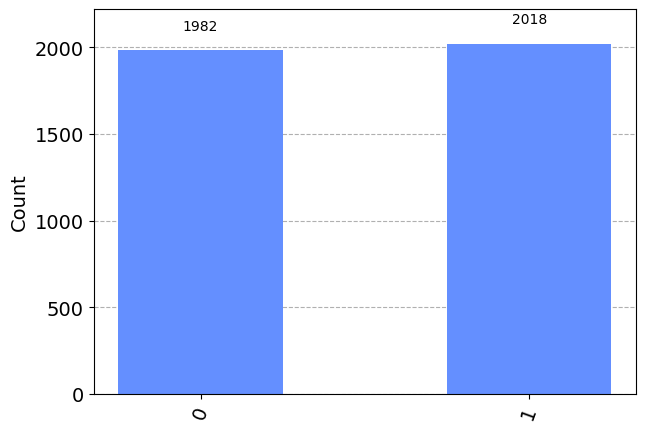

In [504]:
job_result = job.result()
plot_histogram(job_result.get_counts())